### Logistic Regression Manipulation code


Logistic regression using Neural network on Wine dataset for binary classification.


In [1]:
# Code by Bhavy Kharbanda
# Sap id: 500082531

In [2]:
# Importing the libraries
import sklearn
import torch
import torch.nn as nn
import torch.nn.functional as F

# Importing the iris dataset from sklearn
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
# Making the object for iris data set and taking the dataset in the iris object
# x contains the data attributes and y contains th etarget variable
wine=load_wine()
X=wine['data']
y=wine['target']

In [4]:
# Printing the iris dataset
print("\nWine dataset: \n")
print(wine)


Wine dataset: 

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [5]:
y.shape

(178,)

In [6]:
# Shape is 178 that is the size of the target variable is 178 instances 

In [7]:
# Preprocessing the Dataset
scaler=StandardScaler()
X=scaler.fit_transform(X)
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)


In [8]:
# Splitting the dataset in train and test datas, in a ratio of 80:20
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=32)

In [9]:
# Size of the training dataset
X_train.shape

torch.Size([142, 13])

In [10]:
# Applying the Logistic regression for the classification of the dataset
class LogisticRegression(nn.Module):
  def __init__(self,n_features,h1):
    super(LogisticRegression,self).__init__()
    self.layer1=nn.Linear(n_features,h1)
    self.layer2=nn.Linear(h1,3)
    self.softmax=nn.Softmax(dim=1)

# using the Relu activation function
  def forward(self,x):
    out=F.relu(self.layer1(x))
    out=F.relu(self.layer2(out))
    out=self.softmax(out)
    return out

#  Softmax function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range [0,1] and sum to 1.

In [11]:
# Training the model for 50 epochs with a batch size = 20
def train(model,X,y,epocs=50,optimizer=None,loss_fn=None,bsz=20,seed=20):
  torch.manual_seed(seed)
  cost=[]
  for epoch in range(epocs):
    suffle_idx=torch.randperm(y.size(0))
    batches =torch.split(suffle_idx,bsz)
    for batch_idx in batches:
      # 1. Compute the output
      yhat=model(X[batch_idx])

      # 2. Compute the error
    
      loss=loss_fn(yhat,y[batch_idx].long())

      # 3. Compute the Gradient
      optimizer.zero_grad()
      loss.backward()

      # 4. Update the Parameters
      optimizer.step()

      # Log the loss
    with torch.no_grad():
      yhat=model(X)
      curr_loss=loss_fn(yhat,y.long())
      print('Epoc:%3d ' % epoch,end="")
      print('BCE %.2f' % curr_loss)
      cost.append(curr_loss)
  return cost

In [12]:
# Using the Adam Optimizer for improving the weights and hence accuracy of the model.
model=LogisticRegression(n_features=X_train.size(1),h1=20)
optimizer=torch.optim.Adam(model.parameters(),lr=.001)
loss_fn=nn.CrossEntropyLoss()

In [13]:
# Calculating the cost/log loss after each epoch
cost =train(model,X_train,y_train,optimizer=optimizer,loss_fn=loss_fn)

Epoc:  0 BCE 1.09
Epoc:  1 BCE 1.08
Epoc:  2 BCE 1.06
Epoc:  3 BCE 1.05
Epoc:  4 BCE 1.04
Epoc:  5 BCE 1.03
Epoc:  6 BCE 1.01
Epoc:  7 BCE 1.00
Epoc:  8 BCE 0.98
Epoc:  9 BCE 0.97
Epoc: 10 BCE 0.95
Epoc: 11 BCE 0.93
Epoc: 12 BCE 0.92
Epoc: 13 BCE 0.90
Epoc: 14 BCE 0.89
Epoc: 15 BCE 0.87
Epoc: 16 BCE 0.86
Epoc: 17 BCE 0.85
Epoc: 18 BCE 0.84
Epoc: 19 BCE 0.83
Epoc: 20 BCE 0.82
Epoc: 21 BCE 0.81
Epoc: 22 BCE 0.81
Epoc: 23 BCE 0.80
Epoc: 24 BCE 0.79
Epoc: 25 BCE 0.79
Epoc: 26 BCE 0.79
Epoc: 27 BCE 0.78
Epoc: 28 BCE 0.78
Epoc: 29 BCE 0.78
Epoc: 30 BCE 0.77
Epoc: 31 BCE 0.77
Epoc: 32 BCE 0.77
Epoc: 33 BCE 0.77
Epoc: 34 BCE 0.76
Epoc: 35 BCE 0.76
Epoc: 36 BCE 0.76
Epoc: 37 BCE 0.76
Epoc: 38 BCE 0.76
Epoc: 39 BCE 0.76
Epoc: 40 BCE 0.75
Epoc: 41 BCE 0.75
Epoc: 42 BCE 0.75
Epoc: 43 BCE 0.75
Epoc: 44 BCE 0.75
Epoc: 45 BCE 0.75
Epoc: 46 BCE 0.75
Epoc: 47 BCE 0.75
Epoc: 48 BCE 0.74
Epoc: 49 BCE 0.74


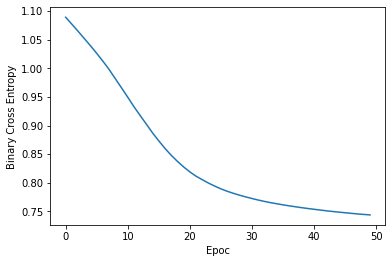

In [14]:
# Plotting the graph between epochs and Binary cross entropy.
# Binary cross entropy is nothing but Log loss as the loss function for the model.
plt.plot(range(len(cost)),cost)
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoc')
plt.show()

In [15]:
with torch.no_grad():
  train_pred=model(X_train)
  #train_pred
  train_acc=(torch.argmax(train_pred,dim=1)==y_train).float().mean()
  print('Training Accuracy: %.2f' %train_acc)
  test_pred=model(X_test)
  test_acc=(torch.argmax(test_pred,dim=1)==y_test).float().mean()
  print('Testing Accuracy: %.2f' %test_acc)

Training Accuracy: 0.94
Testing Accuracy: 0.81


### Changing the Optimizer

In [16]:
# Using the NAdam Optimizer for improving the weights and hence accuracy of the model.
# As it gives the best result for Relu Models
model=LogisticRegression(n_features=X_train.size(1),h1=20)
optimizer=torch.optim.NAdam(model.parameters(),lr=.001)
loss_fn=nn.CrossEntropyLoss()

In [17]:
# Calculating the cost/log loss after each epoch
cost =train(model,X_train,y_train,optimizer=optimizer,loss_fn=loss_fn)

Epoc:  0 BCE 1.11
Epoc:  1 BCE 1.10
Epoc:  2 BCE 1.10
Epoc:  3 BCE 1.09
Epoc:  4 BCE 1.08
Epoc:  5 BCE 1.07
Epoc:  6 BCE 1.06
Epoc:  7 BCE 1.04
Epoc:  8 BCE 1.03
Epoc:  9 BCE 1.02
Epoc: 10 BCE 1.00
Epoc: 11 BCE 0.99
Epoc: 12 BCE 0.97
Epoc: 13 BCE 0.95
Epoc: 14 BCE 0.94
Epoc: 15 BCE 0.92
Epoc: 16 BCE 0.91
Epoc: 17 BCE 0.89
Epoc: 18 BCE 0.88
Epoc: 19 BCE 0.87
Epoc: 20 BCE 0.86
Epoc: 21 BCE 0.85
Epoc: 22 BCE 0.84
Epoc: 23 BCE 0.83
Epoc: 24 BCE 0.82
Epoc: 25 BCE 0.81
Epoc: 26 BCE 0.81
Epoc: 27 BCE 0.80
Epoc: 28 BCE 0.80
Epoc: 29 BCE 0.79
Epoc: 30 BCE 0.79
Epoc: 31 BCE 0.78
Epoc: 32 BCE 0.78
Epoc: 33 BCE 0.78
Epoc: 34 BCE 0.77
Epoc: 35 BCE 0.77
Epoc: 36 BCE 0.77
Epoc: 37 BCE 0.76
Epoc: 38 BCE 0.76
Epoc: 39 BCE 0.76
Epoc: 40 BCE 0.76
Epoc: 41 BCE 0.76
Epoc: 42 BCE 0.75
Epoc: 43 BCE 0.75
Epoc: 44 BCE 0.75
Epoc: 45 BCE 0.75
Epoc: 46 BCE 0.75
Epoc: 47 BCE 0.75
Epoc: 48 BCE 0.75
Epoc: 49 BCE 0.75


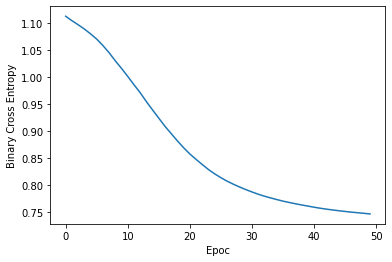

In [18]:
# Plotting the graph between epochs and Binary cross entropy.
# Binary cross entropy is nothing but Log loss as the loss function for the model.
plt.plot(range(len(cost)),cost)
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoc')
plt.show()

Comparing the accuracies between Adam and Nadam optimizers

In [19]:
with torch.no_grad():
  train_pred=model(X_train)
  #train_pred
  train_acc=(torch.argmax(train_pred,dim=1)==y_train).float().mean()
  print('Training Accuracy: %.2f' %train_acc)
  test_pred=model(X_test)
  test_acc=(torch.argmax(test_pred,dim=1)==y_test).float().mean()
  print('Testing Accuracy: %.2f' %test_acc)

Training Accuracy: 0.92
Testing Accuracy: 0.83
